In [13]:
import sys
import spotipy
import spotipy.util as util

scope = 'user-library-read'

if len(sys.argv) > 1:
    username = sys.argv[1]
else:
    print("Usage: %s username" % (sys.argv[0],))
    sys.exit()

token = util.prompt_for_user_token('f9y917w3e0sknn572iarf1yyg',scope,client_id='5f1daf266e144394b52fafc256541505',client_secret='5b192878a9a5471c986a4f28cc34ede9',redirect_uri='https://localhost:5000/callback/')

if token:
    sp = spotipy.Spotify(auth=token)
    results = sp.current_user_saved_tracks()
    for item in results['items']:
        track = item['track']
        print(track['name'] + ' - ' + track['artists'][0]['name'])
else:
    print("Can't get token for", username)

Another One Bites The Dust - Remastered 2011 - Queen
Bohemian Rhapsody - 2011 Mix - Queen
Sweater - Leif Bent
Sukoon Mila - Arijit Singh
Jaan De - Shamoon Ismail
Anjaana Anjaani Ki Kahani - Nikhil D'Souza
Sifarish - Shor
Meer-E-Kaarwan - Amit Mishra
Parayuvaan - From "Ishq" - Sid Sriram
Khidkiyan - Dream Note
Newbury Street - Parekh & Singh
BURN IT DOWN - Linkin Park
What I've Done - Linkin Park
Dance Monkey - Tones And I
In the End - Linkin Park
Numb - Linkin Park
Best Fake Smile - James Bay
Call Out My Name - The Weeknd
Blinding Lights - The Weeknd
Hold Back The River - James Bay


SpotifyOauthError: No client_id. Pass it or set a SPOTIPY_CLIENT_ID environment variable.

In [68]:
from spotipy.oauth2 import SpotifyClientCredentials

In [69]:
import json

In [70]:
{"client_id": "5e9a80618b284145b54bb1f7df94bb6c",
"client_secret": "0cdef7160e4143118e48abdd939668e8"}

{'client_id': '5e9a80618b284145b54bb1f7df94bb6c',
 'client_secret': '0cdef7160e4143118e48abdd939668e8'}

In [71]:
credentials = json.load(open(r'C:\Users\hp\authorization.json',encoding="utf8"))
client_id = credentials['client_id']
client_secret = credentials['client_secret']

playlist_index = 0

playlists = json.load(open(r'C:\Users\hp\playlists_like_dislike.json',encoding="utf8"))
playlist_uri = playlists[playlist_index]['uri']
like = playlists[playlist_index]['like']

In [72]:
client_credentials_manager = SpotifyClientCredentials(client_id=client_id,client_secret=client_secret)

sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [73]:
uri = playlist_uri    # the URI is split by ':' to get the username and playlist ID
username = uri.split(':')[2]
playlist_id = uri.split(':')[4]

In [74]:
results = sp.user_playlist(username, playlist_id, 'tracks')

In [75]:
results

{'tracks': {'href': 'https://api.spotify.com/v1/playlists/0eId4ghKFW8mtjOVnOkMMH/tracks?offset=0&limit=100&additional_types=track',
  'items': [{'added_at': '2020-03-23T09:33:03Z',
    'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/f9y917w3e0sknn572iarf1yyg'},
     'href': 'https://api.spotify.com/v1/users/f9y917w3e0sknn572iarf1yyg',
     'id': 'f9y917w3e0sknn572iarf1yyg',
     'type': 'user',
     'uri': 'spotify:user:f9y917w3e0sknn572iarf1yyg'},
    'is_local': False,
    'primary_color': None,
    'track': {'album': {'album_type': 'album',
      'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/3fMbdgg4jU18AjLCKBhRSm'},
        'href': 'https://api.spotify.com/v1/artists/3fMbdgg4jU18AjLCKBhRSm',
        'id': '3fMbdgg4jU18AjLCKBhRSm',
        'name': 'Michael Jackson',
        'type': 'artist',
        'uri': 'spotify:artist:3fMbdgg4jU18AjLCKBhRSm'}],
      'available_markets': ['AD',
       'AE',
       'AR',
       'AT',
       'A

In [76]:
playlist_tracks_data = results['tracks']
playlist_tracks_id = []
playlist_tracks_titles = []
playlist_tracks_artists = []
playlist_tracks_first_artists = []

for track in playlist_tracks_data['items']:
    playlist_tracks_id.append(track['track']['id'])
    playlist_tracks_titles.append(track['track']['name'])
    # adds a list of all artists involved in the song to the list of artists for the playlist
    artist_list = []
    for artist in track['track']['artists']:
        artist_list.append(artist['name'])
    playlist_tracks_artists.append(artist_list)
    playlist_tracks_first_artists.append(artist_list[0])

In [77]:
features = sp.audio_features(playlist_tracks_id)

In [78]:
import numpy as np
import pandas as pd

In [79]:
features_df = pd.DataFrame(data=features, columns=features[0].keys())

In [80]:
features_df['title'] = playlist_tracks_titles
features_df['first_artist'] = playlist_tracks_first_artists
features_df['all_artists'] = playlist_tracks_artists
#features_df = features_df.set_index('id')
features_df = features_df[['id', 'title', 'first_artist', 'all_artists',
                           'danceability', 'energy', 'key', 'loudness',
                           'mode', 'acousticness', 'instrumentalness',
                           'liveness', 'valence', 'tempo',
                           'duration_ms', 'time_signature']]
features_df.head(50)

,id,title,first_artist,all_artists,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,541jTq3SOEELKvcfA0jHI0,The Way You Make Me Feel,Michael Jackson,[Michael Jackson],0.608,0.816,1,-5.926,1,0.036700,0.000554,0.1160,0.5070,114.484,297400,4
1,0utckWY4eeZAfNL3LCiGdy,Main Chahta hun,Swastik The Band,[Swastik The Band],0.602,0.564,4,-6.164,0,0.381000,0.132000,0.1180,0.1890,129.973,349922,4
2,3FTRSa9mWB3kKx2jkhUAN3,Tum Jab Paas,Prateek Kuhad,[Prateek Kuhad],0.751,0.344,6,-7.712,1,0.528000,0.000002,0.1130,0.4710,122.100,235932,3
3,1gWtHDe403RuyZqhvSRcv8,Tune Kaha,Prateek Kuhad,[Prateek Kuhad],0.362,0.763,3,-8.514,1,0.015000,0.004810,0.2370,0.4310,187.291,216886,4
4,4kXkT9HF9ZfDjuv3LIKcwJ,"Dil Beparvah - The Dewarists, Season 5",Ankur Tewari,"[Ankur Tewari, Prateek Kuhad, Dhruv Bhola, Nik...",0.762,0.391,1,-11.735,1,0.867000,0.000521,0.1120,0.3550,137.956,250000,3
5,5VSJ9OfZx8V91A7u8Fuoh1,Aaoge Tum Kabhi,The Local Train,[The Local Train],0.534,0.863,0,-4.616,1,0.015200,0.016700,0.1440,0.3740,98.006,313163,4
6,1xaj4bm3GMthtoZHUfepl1,Ye Tumhari Meri Baatein,Dominique,[Dominique],0.351,0.552,5,-7.404,1,0.393000,0.000494,0.1120,0.3190,87.769,324058,4
7,3APdIdF8H0jsxSuGOqXedS,Kabhi Kabhi Aditi,Rashid Ali,[Rashid Ali],0.791,0.558,7,-7.155,0,0.276000,0.000000,0.0859,0.8720,95.077,218836,4
8,4w90JoFrkoYfxe4S8DWD7T,"Jaane Kyun (From ""Dostana"")",Vishal-Shekhar,"[Vishal-Shekhar, Vishal Dadlani]",0.778,0.812,4,-8.561,0,0.057300,0.000008,0.2430,0.7910,99.962,277987,4
9,2qgXrzJsry4KgYoJCpuaul,Choo Lo,The Local Train,[The Local Train],0.512,0.695,4,-6.349,1,0.026500,0.008150,0.1460,0.3510,145.957,233630,4


In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62]),
 <a list of 63 Text xticklabel objects>)

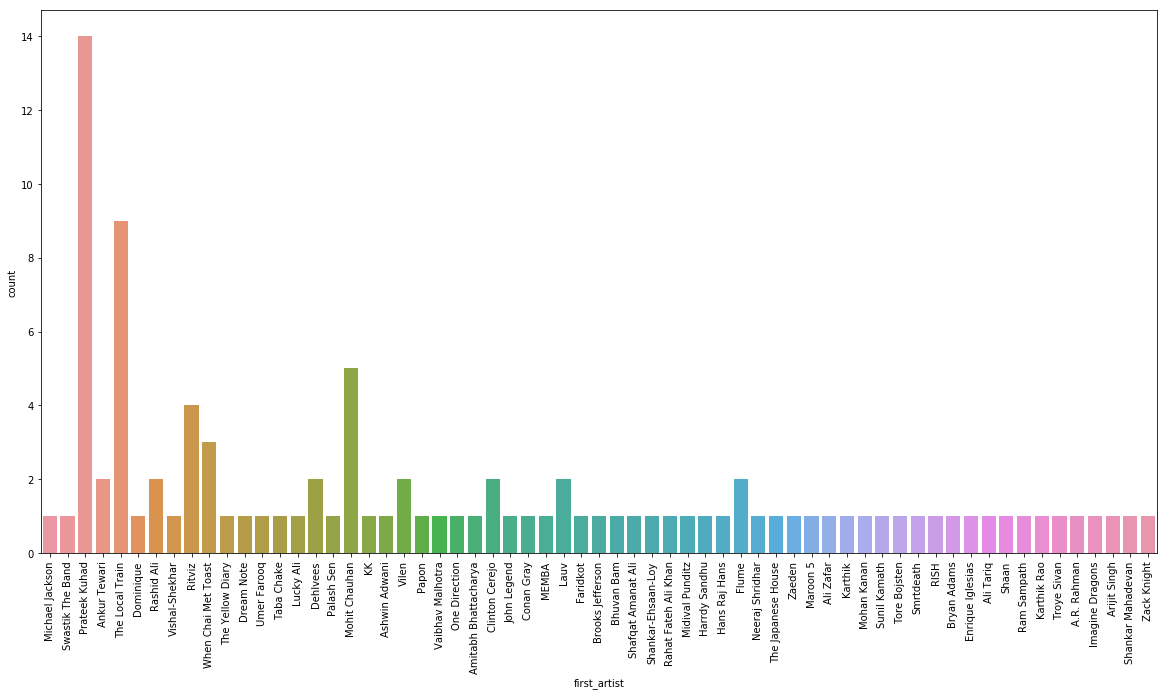

In [82]:
plt.figure(figsize=(20,10))
sns.countplot(features_df['first_artist'])
plt.xticks(rotation=90)

In [84]:
num_bars = []
num_sections = []
num_segments = []

for i in range(0,len(features_df['id'])):
    analysis = sp.audio_analysis(features_df.iloc[i]['id'])
    num_bars.append(len(analysis['bars'])) # beats/time_signature
    num_sections.append(len(analysis['sections']))
    num_segments.append(len(analysis['segments']))

ReadTimeout: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)

In [ ]:
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
plt.hist(num_bars, bins=20)
plt.xlabel('num_bars')
plt.subplot(1,3,2)
plt.hist(num_sections, bins=20)
plt.xlabel('num_sections')
plt.subplot(1,3,3)
plt.hist(num_segments, bins=20)
plt.xlabel('num_segments')